# 6주차 (0408) Review

---
## `ch07.ex01`

## NLTK lnaugural

In [ ]:
# lookup error가 나는 경우,
# 아래를 실행하여 전체 코퍼스를 다운로드
# 그렇지 않은 경우 그냥 평소대로

import nltk
nltk.download() 

In [1]:
import nltk
nltk.download('brown', 'inaugural') 

[nltk_data] Downloading package brown to inaugural...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [2]:
brown = nltk.corpus.brown

In [3]:
# cfd

cfd = nltk.ConditionalFreqDist(
    (genre, word.lower())
    for genre in brown.categories()
    for word in brown.words(categories=genre) # fileids도 정해줄 수 있기 때문에
)

modals = ['can', 'could', 'will', 'would', 'may', 'might']

# conditions은 모든 장르, samples은 조동사
# tabulate은 표로 나타내주는 기능
cfd.tabulate(conditions=brown.categories(), samples=modals)

                  can could  will would   may might 
      adventure    48   154    51   194     7    59 
 belles_lettres   249   216   246   397   221   113 
      editorial   124    57   235   185    79    39 
        fiction    39   168    56   291    10    44 
     government   119    38   244   120   179    13 
        hobbies   276    59   269    83   143    22 
          humor    17    33    13    56     8     8 
        learned   367   159   340   321   336   128 
           lore   170   142   178   188   170    50 
        mystery    45   145    25   189    15    57 
           news    94    87   389   246    93    38 
       religion    84    59    72    69    79    12 
        reviews    45    40    61    48    47    26 
        romance    79   195    49   247    11    51 
science_fiction    16    49    17    80     4    12 


In [4]:
# modals의 빈도수가 포함된 cfd 
# word에서 modal_verb가 되는 것

cfd1 = nltk.ConditionalFreqDist(
    (genre, modal)
    for genre in brown.categories()
    for modal in ['can', 'could', 'will', 'would', 'may', 'might']
    
    for word in brown.words(categories=genre)
    
        # word 중에서 modal이 포함된 것만 추출
        if word.lower() == modal
)

cfd1.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


### Inaugural
- 연설문 코퍼스

In [5]:
# import는 동일
inaugural = nltk.corpus.inaugural

In [7]:
inaugural.fileids() # 연도-이름.txt

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [13]:
# ['america', 'citizen'] 빈도수를 cfd로 만드시오.
# 각 단어가 연설문에서 얼마나 쓰였는지를 알기 위함.
# 위에랑 똑같은데, modal => 'america', 'citizen' 단어가 바뀐 차이
# == 보다는 다른 기호로 가는 게 좋음.

cfd2 = nltk.ConditionalFreqDist(
    (target_word, fileid[:-4])
    for fileid in inaugural.fileids()
    for target_word in ['america', 'citizen']
    
    for word in inaugural.words(fileid) 
        # 3가지 방법이 有
        # if word.lower() == target_word
        # if target_word in word.lower()
        if word.lower().startswith(target_word)
)

# 표보다는 plot이 예쁨
# 아래 참고
cfd2.tabulate()

        1789-Washington 1793-Washington      1797-Adams  1801-Jefferson  1805-Jefferson    1809-Madison    1813-Madison     1817-Monroe     1821-Monroe      1825-Adams    1829-Jackson    1833-Jackson   1837-VanBuren   1841-Harrison       1845-Polk     1849-Taylor     1853-Pierce   1857-Buchanan    1861-Lincoln    1865-Lincoln      1869-Grant      1873-Grant      1877-Hayes   1881-Garfield  1885-Cleveland   1889-Harrison  1893-Cleveland   1897-McKinley   1901-McKinley  1905-Roosevelt       1909-Taft     1917-Wilson    1921-Harding   1925-Coolidge     1929-Hoover  1933-Roosevelt  1937-Roosevelt  1941-Roosevelt  1945-Roosevelt     1949-Truman 1953-Eisenhower 1957-Eisenhower    1961-Kennedy    1965-Johnson      1969-Nixon      1973-Nixon     1977-Carter     1981-Reagan     1985-Reagan       1989-Bush    1993-Clinton    1997-Clinton       2001-Bush       2005-Bush      2009-Obama      2013-Obama      2017-Trump      2021-Biden 
america               2               1               8        

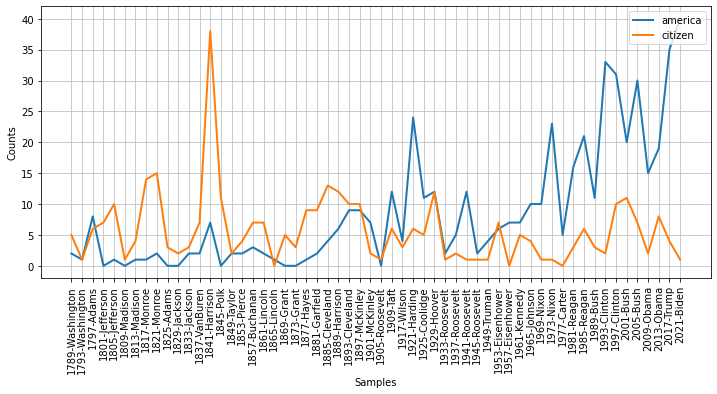

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
# !pip install maplotlib

import matplotlib.pyplot as plt

# 이미지가 너무 작아서 추가한 코드
plt.figure(figsize=(12, 5))

cfd2.plot()

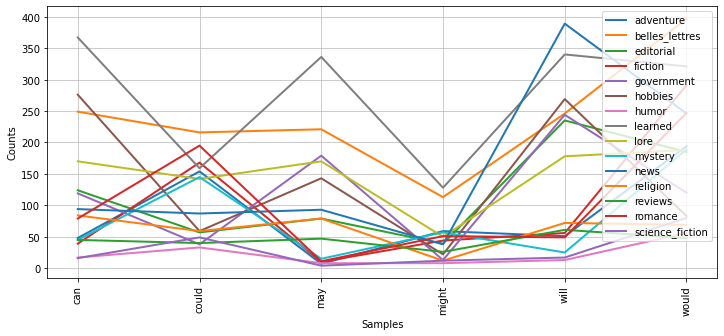

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
# 위에서 했던 modals의 빈도수가 포함된 cfd도 표로 보기
plt.figure(figsize=(12, 5))
cfd1.plot()

## `ch07.ex02`

## Tuple & List
- 둘은 되게 비슷함.
- `유의` 불변 객체(튜플) vs. 가변 객체(리스트)
- 주로 리스트를 쓰되, 불변이 필요한 경우에만 튜플을 사용

In [17]:
# 생성하는 방법
emptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

In [18]:
# <요소가 여러 개일 때>

## tuple
alphabetT = ('a', 'b')

# 이렇게 괄호 없이도 튜플 만들어짐.
# 따라서 얘를 더 많이 씀
alphabetT = 'a', 'b'
print(alphabetT)


## list
alphabetL = ['a', 'b']
print(alphabetL)

('a', 'b')
['a', 'b']


In [19]:
# <요소 1개 일 때> `주의`

# 이렇게 하면, 튜플이 아니라 스트링으로 인식
alphaT = ('a')
type(alphaT)

str

In [20]:
# 요소가 하나일 땐, 괄호를 쳐도 튜플로 인식하지 않으니,
# 아래와 같은 방식으로 사용해야 함.
alphaT = ('b', )
type(alphaT)

tuple

- `packing`: 한 변수에 여러 데이터를 할당하는 것.
    - list, tuple 자체를 말함. 예) a = [1, 2, 3, 4]
- `unpacking`: 한 변수에 여러 데이터가 들어 있을 때 여러 변수에 나누어주는 것

In [21]:
# 할당할 때 여러개 가능
# unpacking

a, b, c = 'kim'

# 이 경우 a = kim, b = kim, c = kim 이 되는 것은 아님.
# a = 'k', b = 'i', c = 'm'
a, b, c

('k', 'i', 'm')

In [22]:
# 튜플 => 값을 교환해야 할 때, 편함

# pwd와 userId를 바꾸고 싶을 때,
pwd = 'abcd'
userId = 'sky'

'''
# 이 방법으로 안 해도 됨
temp1 = userId
temp2 = pwd

pwd = temp1
userId = temp2
'''

# 이 방법 가능!
pwd, userId = userId, pwd 
pwd, userId

('sky', 'abcd')

In [23]:
# 튜플 연산할 때, 
# 리스트와 비슷하게 다 가능함.

('a', ) + (1, 2)
(1, 2) * 3

(1, 2, 1, 2, 1, 2)

In [24]:
# 튜플은 불변객체라면서
# 이게 어떻게 더해지나? => id 값을 확인해 보면 됨!

x = ('a', )
y = (1, 2)
x + y

('a', 1, 2)

In [25]:
# id 값이 다름!
# 더했다고 해서 x, y가 바뀌는 것이 아니라,
# 새로운 변수에 할당이 되는 것!
id(x), id(x + y)

(140218649060544, 140218079440832)

In [26]:
# 비교도 가능함
# 첫 인자부터 비교

x = 1, 2
y = 1, 6

# 결과: True
x < y

True

In [27]:
# 순회도 가능함!

for i in x:
    print(x)

(1, 2)
(1, 2)


In [28]:
# 리스트 컴프리헨션에서 사용도 가능,
# 다만 얘네가 리스트로 바뀌는 것
[i for i in x] 

[1, 2]

In [29]:
# tuple comprehension이 있나..? => 없다!
# tuple로 변경은 가능함.

# 리스트컴프리헨션을 tuple에 넣는 방법
tuple([i for i in x])

# *를 하고, 리스트컴프리헨션을 가져오고, 쉼표(,)를 넣는 방법
# 근데 이 방법은 위 방법에 비해 느리다.
*[i for i in x], 

# 그냥 원래 리스트컴프리헨션 사용하는 것이 가장 좋음. 
# 정말 필요한 경우 아니면, 튜플로 굳이 바꿀 필요가 없다.

(1, 2)

In [32]:
# 형 변환
dog = 'dog'

# 방법1 - 각 인자를 하나하나 넣어서 튜플로 만듦
print(tuple(dog))

# 방법2 - 전체를 튜플에 넣음
print((dog,))

# 형 변환할 때, 두 방법의 차이를 주의해야 함.
# 리스트도 동일
print(list(dog))
print([dog])

('d', 'o', 'g')
('dog',)
['d', 'o', 'g']
['dog']


In [33]:
# slicing도 동일하게 가능

dogT = tuple(dog)
dogT[0]

'd'

#### **정리**
- tuple 장점
    - 변하지 않은 데이터 시퀀스를 만들 수 있다. 
    - 다른 사람이 실수로 변경할 수도 있는데, 타인의 접근을 막을 수 있다.
        - blue = 1, white = 2, ... <= 내가 만든 코드를 못 바꾸게 할 때
    - 메모리 사용이 적다.
    - 중복 데이터 사용 가능 (set과 비교하여!)
- list 장점
    - 튜플 장점이 필요없을 때, 전부 리스트 사용
    - 데이터를 순차적으로 파악할 때
    - 중복 데이터를 사용 가능 (set과 비교하여!)

### 리스트의 유용한 함수들
- 주로 변경, 삭제, 추가와 관련된 함수!
- 리스트 컴프리헨션 업그레이드 

In [38]:
# 숫자가 막 넣어짐!@!
# num = [0, 1, 2, 3, 4]

num = list(range(5))
num

[0, 1, 2, 3, 4]

In [39]:
# 추가 | append: 맨 뒤에 요소 추가. 여러 개 한 번에 추가는 안 됨.
# num = [0, 1, 2, 3, 4, 6]

num.append(6)
num

[0, 1, 2, 3, 4, 6]

In [40]:
# 추가2 | insert(index, item): index 위치에 item을 추가하겠다.
# num = [8, 0, 1, 2, 3, 4, 6]

num.insert(0, 8)
num

[8, 0, 1, 2, 3, 4, 6]

In [41]:
# 추가3 | extend(list): 여러 개를 추가하고 싶다
# 이때, 리스트로 가져가야 함. 리스트를 리스트로 확장! 
# num = [8, 0, 1, 2, 3, 4, 6, 7, 7]

x = [7, 7]
num.extend(x)
num

[8, 0, 1, 2, 3, 4, 6, 7, 7]

In [42]:
# append(list)로 하면, list가 통째로 들어감!
# num = [8, 0, 1, 2, 3, 4, 6, 7, 7, [7, 7]]

num.append(x)
num

[8, 0, 1, 2, 3, 4, 6, 7, 7, [7, 7]]

In [43]:
# 즉, extend는 +와 같은 의미로 볼 수 있음!
# num = [8, 0, 1, 2, 3, 4, 6, 7, 7, [7, 7], 7, 7]

num += x 
num

[8, 0, 1, 2, 3, 4, 6, 7, 7, [7, 7], 7, 7]

In [44]:
# offset을 활용할 수도 있음.
# num = [9, 0, 1, 2, 3, 4, 6, 7, 7, [7, 7], 7, 7]

num[0] = 9
num

[9, 0, 1, 2, 3, 4, 6, 7, 7, [7, 7], 7, 7]

In [45]:
# slice도 가능
# num = [2, 2, 2, 2, 3, 4, 6, 7, 7, [7, 7], 7, 7]

# 3번째까지 2, 2, 2로 바꾸겠다!
num[:3] = 2, 2, 2
num

[2, 2, 2, 2, 3, 4, 6, 7, 7, [7, 7], 7, 7]

In [46]:
# str 넣었을 때 주의해야 함
# 하나하나씩 언패킹되어 들어감!
# num = ['c', 'a', 't', 2, 3, 4, 6, 7, 7, [7, 7], 7, 7]

num[:3] = 'cat' 
num

['c', 'a', 't', 2, 3, 4, 6, 7, 7, [7, 7], 7, 7]

In [47]:
# 삭제 | del list[삭제하고 싶은 idx]
# num = [2, 3, 4, 6, 7, 7, [7, 7], 7, 7]

del num[:3]
num

[2, 3, 4, 6, 7, 7, [7, 7], 7, 7]

In [48]:
# 삭제2 | remove(value)
# num = [3, 4, 6, 7, 7, [7, 7], 7, 7]

num.remove(2)
num

[3, 4, 6, 7, 7, [7, 7], 7, 7]

In [49]:
# 삭제3 | pop(index): index를 설정하지 않으면, 기본값은 -1
# num = [3, 4, 6, 7, 7, [7, 7], 7]

num.pop()
num

[3, 4, 6, 7, 7, [7, 7], 7]

In [50]:
# 맨 앞에 있는 요소 삭제
# num = [4, 6, 7, 7, [7, 7], 7]

num.pop(0)
num

[4, 6, 7, 7, [7, 7], 7]

In [51]:
# 다 지우는 것: clear

num.clear()
num

[]

In [52]:
# 인덱스 찾기 - index(value), find(value)

# num list 다시 초기화
# num = [0, 1, 2, 3, 4]
num = list(range(5))
num.index(4)

4

In [53]:
# 요소가 있는지 파악하는 것
# True

0 in num

True

In [54]:
# 정렬 | sort(), sorted()

# 그냥 변한 값만 복사해서 출력하는 것 뿐
sorted(num, reverse=True) 

[4, 3, 2, 1, 0]

In [55]:
num # 안 변했음.

[0, 1, 2, 3, 4]

In [56]:
# 정말 변화시킴! 
# 접근방법: list.sort()
# 이때 값을 할당하지 않아도 된다.

num.sort(reverse=True) 

In [57]:
num # 변했음.

[4, 3, 2, 1, 0]

In [ ]:
# 정렬2 | reverse(), reversed()

num.reverse() # 값 반환 O
reversed(num) # 값 반환 X

In [60]:
# 할당
# a = [1, 2, 3, 4]

a = list(range(1, 5))
a

[1, 2, 3, 4]

In [61]:
# 이퀄사인: 같은 메모리 주소를 참조하고 있는 것
# a가 바뀌면 b도 같이 변하는 것.

b = a 
b[0] = 6
a, b

([6, 2, 3, 4], [6, 2, 3, 4])

In [62]:
# 메모리주소는 id로 찾을 수 있음!
id(a), id(b)

(140218649978368, 140218649978368)

In [63]:
# shallow copy: 참조하지 않고 객체에 할당하는 방법. (얕은 복사)
c = a.copy()
d = list(a)
e = a[:]

# 다 다른 리스트가 된다!
id(a), id(c), id(d), id(e)

(140218649978368, 140218369122496, 140218649980032, 140218369238784)

In [64]:
# deepcopy: 하위에 충접된 리스트 요소가 안 바뀌도록하는 방법. (깊은 복사)
a.append([1, 2, 3])
a

[6, 2, 3, 4, [1, 2, 3]]

In [65]:
f = a.copy()

# 리스트 안에 있는 어떤 요소가 가변 객체일 때 
# (a의 경우 지금 가변 객체인 리스트가 들어가 있음)
# 주소는 다르지만,,
print(id(a), id(f))

# 쉘로우 카피를 했는데도, 같이 변함.
f[-1][0] = 9 
print(a, f)

140218649978368 140218649979456
[6, 2, 3, 4, [9, 2, 3]] [6, 2, 3, 4, [9, 2, 3]]


In [66]:
# 위와 같은 경우까지 막고 싶을 때, 하는 것이
# deepcopy를 사용하는 것!
# 이 경우, 차원이 다른 것까지 복사가 되지 않음.

import copy
g = copy.deepcopy(a)
g

[6, 2, 3, 4, [9, 2, 3]]

In [67]:
# a는 바뀌지 않는 것을 확인할 수 있음.
g[-1][0] = 10
a, g

([6, 2, 3, 4, [9, 2, 3]], [6, 2, 3, 4, [10, 2, 3]])

In [68]:
# 순회 | zip, enumerate

# zip: 여러 리스트 동시 순회,
# 만약 리스트 길이가 다르다면
# 짧은 애를 기준으로 순회.

name = ['kate', 'royce', 'phill']
age = [77, 44, 54]

# (name, age)
for item1, item2 in zip(name, age):
    print((item1, item2))

('kate', 77)
('royce', 44)
('phill', 54)


In [69]:
# 위에랑 다름!

for item in name:
    for item2 in age:
        print((item1, item2))

('phill', 77)
('phill', 44)
('phill', 54)
('phill', 77)
('phill', 44)
('phill', 54)
('phill', 77)
('phill', 44)
('phill', 54)


In [70]:
# 더 쉽게 가져가는 방법!
list(zip(name, age))

[('kate', 77), ('royce', 44), ('phill', 54)]

In [71]:
# 만약, 리스트를 도는데, 나는 인덱스가 필요하다
# enumerate: 리스트 + 인덱스
for idx, item in enumerate(name):
    print(idx, item)

0 kate
1 royce
2 phill


In [72]:
# list(zip(name, age))을 리스트 컴프리헨션으로 바꾸기!

[(item1, item2) for item1, item2 in zip(name, age)]

[('kate', 77), ('royce', 44), ('phill', 54)]

In [73]:
# name, age를 이용해서 새로운 리스트를 생성하는데 
# (이름, 나이)로 이루어져 있고, for문을 사용 (리스트컴프리헨션 사용 x)

info = []
for i, j in zip(name, age):
    info.append((i, j))
    
info

[('kate', 77), ('royce', 44), ('phill', 54)]

In [74]:
# 1. for 문의 리스트컴프리헨션으로 바꿔보기

'''
# 원하는 출력 결과
[('kate', 77),
 ('kate', 44),
 ('kate', 54),
 ('royce', 77),
 ('royce', 44),
 ('royce', 54),
 ('phill', 77),
 ('phill', 44),
 ('phill', 54)]
'''

[(i, j) for i in name for j in age]

[('kate', 77),
 ('kate', 44),
 ('kate', 54),
 ('royce', 77),
 ('royce', 44),
 ('royce', 54),
 ('phill', 77),
 ('phill', 44),
 ('phill', 54)]

In [75]:
# 2. [i, j]가 리스트로 들어가는 리스트로 바꿔보기 (리스트컴프리헨션 사용)

'''
# 원하는 출력 결과
[[('kate', 77), ('royce', 77), ('phill', 77)],
 [('kate', 44), ('royce', 44), ('phill', 44)],
 [('kate', 54), ('royce', 54), ('phill', 54)]]
'''

[
    [(i, j) for i in name] for j in age
]

[[('kate', 77), ('royce', 77), ('phill', 77)],
 [('kate', 44), ('royce', 44), ('phill', 44)],
 [('kate', 54), ('royce', 54), ('phill', 54)]]

In [76]:
sentence = "do not judge a book by its cover"

# 출력 형식 => [(대문자, 첫 글자 대문자, 글자 수), ...] 
# (튜플의 형식)으로 되어 있는 리스트 만들기

words = sentence.split()
[(word.upper(), word.title(), len(word)) for word in words]

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [77]:
text = [
    ['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],
    ['Hansu', 'was', 'no', 'longer', 'in', 'Busan']
]

# 1. 문장마다 스트링으로 변환해서 리스트로 반환
# 예시: ['문장1', '문장2']

print('#1')
print([' '.join(sent) for sent in text])
print()

# 2. 전체를 스트링으로 반환.
# 예시: '문장1 문장2'
print('#2')
print(' '.join([' '.join(sent) for sent in text]))
print()

# 3. 전체 단어 리스트 가져오기
print('#3')
print([word for sent in text for word in sent])

#1
['Sunja said goodnight to her mother', 'Hansu was no longer in Busan']

#2
Sunja said goodnight to her mother Hansu was no longer in Busan

#3
['Sunja', 'said', 'goodnight', 'to', 'her', 'mother', 'Hansu', 'was', 'no', 'longer', 'in', 'Busan']


--- 
#### `리스트 컴프리헨션에서의 조건문`
- if문 - else
- else를 사용할 때는 조건문을 `반복문 앞으로 가져와서` 사용해야 한다.

In [78]:
# 짝수이면 숫자로 가져오고, 홀수이면, '홀수'라는 스트링으로 바꾸시오.

# [i for i in range(10) if i % 2 == 0 else '홀수'] # 이 방식은 nope
[i if i % 2 == 0 else '홀수' for i in range(10)] # 이렇게 해야 함!

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']

---
### `과제` brown corpus 정제하기
=> e-class에 코드 업로드
- brown의 romance 사용
- 정규식 사용 안 됨. 배운 것으로만 하기.
- 문장 분절, 단어 분절.
- 불필요한 것을 제거하기.
    - 문장부호는 다 없애기, POS 제거
    - 's 나 'nt 도 건드려 보자(여력이 된다면). (she's => she, 's)
    - 'fly-dotted' => - 없애고 => fly, dotted
- 글자는 5000개 만!
- 최대한 하드코딩 지양..(품사 제거할 때 유의!)

```
[['They', 'neither', 'liked', ..], [...], ...]
```

In [ ]:
from nltk.corpus import brown

brown.raw(categories='romance')[:5000]

---

### **대면 시험 유의사항**

- 이클래스에 올린 코드는 평가 x
- 대면 시험에서 제출한 코드로 평가하되, 답안 자체가 틀린 경우 점수 절반 깎음
- 대면 시험에서 문제는 보여주지 않음
- 시험 코드 작성 시 팀원과 상의 가능
- 시간도 별로 안 주기 때문에 최대한 많이 쓰고 가는 것이 중요함
- 대면 시험에서 종이 제공, 손코딩
- 손코딩 연습 많이 해보기